<a href="https://colab.research.google.com/github/Devsharma003/Dev/blob/main/simple_liner_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Q1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
delivery=pd.read_csv('delivery_time.csv')

In [ ]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
delivery.columns=['delivery_time','sorting_time']

In [ ]:
#checking missing value
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


no missing value

In [ ]:
#checking duplicate value
delivery[delivery.duplicated()]

,delivery_time,sorting_time


# No duplicated value

<Axes: >

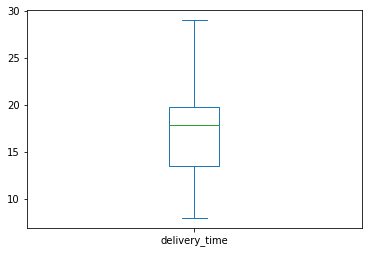

In [ ]:
#checking outlier
delivery.delivery_time.plot(kind='box')

<Axes: >

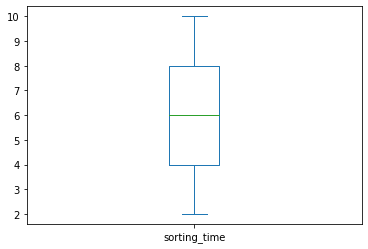

In [ ]:
delivery.sorting_time.plot(kind='box')

# Applying Transformation

In [ ]:
delivery['st_sq']=delivery.sorting_time**2
delivery['st_sqrt']=delivery.sorting_time**0.5
delivery['st_log']=np.log(delivery.sorting_time)
delivery['st_sqrt4']=delivery.sorting_time**0.4

In [ ]:
delivery

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4
0,21.00,10,100,3.162278,2.302585,2.511886
1,13.50,4,16,2.000000,1.386294,1.741101
2,19.75,6,36,2.449490,1.791759,2.047673
3,24.00,9,81,3.000000,2.197225,2.408225
4,29.00,10,100,3.162278,2.302585,2.511886
5,15.35,6,36,2.449490,1.791759,2.047673
6,19.00,7,49,2.645751,1.945910,2.177906
7,9.50,3,9,1.732051,1.098612,1.551846
8,17.90,10,100,3.162278,2.302585,2.511886
9,18.75,9,81,3.000000,2.197225,2.408225


# Correlation Analysis

In [ ]:
delivery.corr()

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4
delivery_time,1.000000,0.825997,0.793906,0.834150,0.833933,0.834847
sorting_time,0.825997,1.000000,0.983967,0.994704,0.977447,0.992266
st_sq,0.793906,0.983967,1.000000,0.960816,0.925659,0.954766
st_sqrt,0.834150,0.994704,0.960816,1.000000,0.993904,0.999768
st_log,0.833933,0.977447,0.925659,0.993904,1.000000,0.996045
st_sqrt4,0.834847,0.992266,0.954766,0.999768,0.996045,1.000000


<Axes: ylabel='delivery_time'>

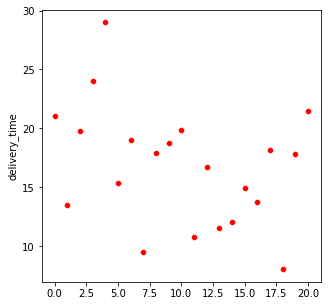

In [ ]:
plt.figure(figsize = (5,5))
sns.scatterplot(delivery['delivery_time'],color='RED')


<Axes: ylabel='sorting_time'>

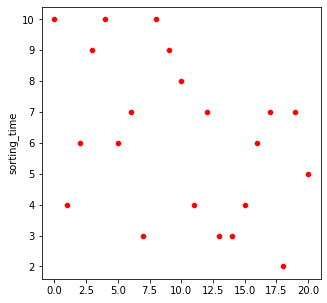

In [ ]:
plt.figure(figsize = (5,5))
sns.scatterplot(delivery['sorting_time'],color='RED')


Correlation between delivery_time and sorting_time seems low

<Axes: xlabel='delivery_time', ylabel='Density'>

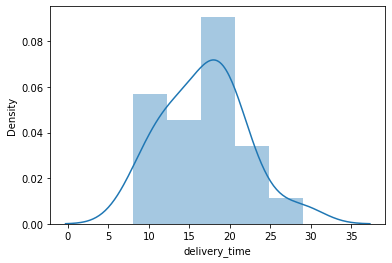

In [ ]:
sns.distplot(delivery['delivery_time'])

<Axes: xlabel='sorting_time', ylabel='Density'>

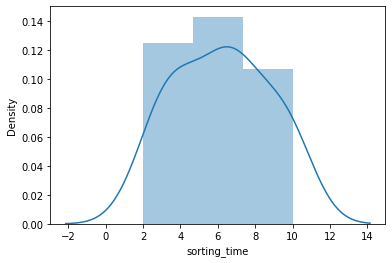

In [ ]:
sns.distplot(delivery['sorting_time'])

(array([3., 5., 5., 6., 1., 1.]),
 array([ 8. , 11.5, 15. , 18.5, 22. , 25.5, 29. ]),
 <BarContainer object of 6 artists>)

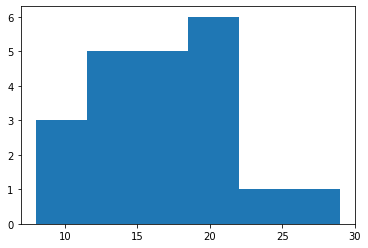

In [ ]:
plt.hist(delivery['delivery_time'],bins=6)

(array([4., 3., 1., 7., 1., 5.]),
 array([ 2.        ,  3.33333333,  4.66666667,  6.        ,  7.33333333,
         8.66666667, 10.        ]),
 <BarContainer object of 6 artists>)

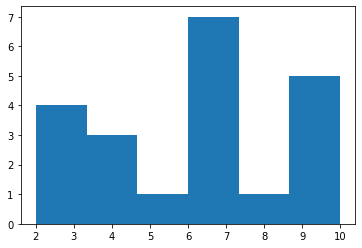

In [ ]:
plt.hist(delivery['sorting_time'],bins=6)

# Model Building

In [ ]:
model1=smf.ols("delivery_time~sorting_time",data=delivery).fit()
model1_sq=smf.ols("delivery_time~st_sq",data=delivery).fit()
model1_sqrt=smf.ols("delivery_time~st_sqrt",data=delivery).fit()
model1_log=smf.ols("delivery_time~st_log",data=delivery).fit()
model1_sqrt4=smf.ols("delivery_time~st_sqrt4",data=delivery).fit()

# Model Testing

In [ ]:
print(model1.params)
print(model1_sq.params)
print(model1_sqrt.params)
print(model1_log.params)
print(model1_sqrt4.params)

Intercept       6.582734
sorting_time    1.649020
dtype: float64
Intercept    11.237205
st_sq         0.124870
dtype: float64
Intercept   -2.518837
st_sqrt      7.936591
dtype: float64
Intercept    1.159684
st_log       9.043413
dtype: float64
Intercept    -7.050883
st_sqrt4     11.751321
dtype: float64


In [ ]:
print(model1.tvalues)
print(model1_sq.tvalues)
print(model1_sqrt.tvalues)
print(model1_log.tvalues)
print(model1_sqrt4.tvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64
Intercept    9.398601
st_sq        5.691330
dtype: float64
Intercept   -0.840911
st_sqrt      6.592434
dtype: float64
Intercept    0.472460
st_log       6.586789
dtype: float64
Intercept   -1.926237
st_sqrt4     6.610589
dtype: float64


In [ ]:
print(model1.pvalues)
print(model1_sq.pvalues)
print(model1_sqrt.pvalues)
print(model1_log.pvalues)
print(model1_sqrt4.pvalues)

Intercept       0.001147
sorting_time    0.000004
dtype: float64
Intercept    1.415704e-08
st_sq        1.739194e-05
dtype: float64
Intercept    0.410857
st_sqrt      0.000003
dtype: float64
Intercept    0.641980
st_log       0.000003
dtype: float64
Intercept    0.069169
st_sqrt4     0.000003
dtype: float64


In [ ]:
print(model1.rsquared)
print(model1_sq.rsquared)
print(model1_sqrt.rsquared)
print(model1_log.rsquared)
print(model1_sqrt4.rsquared)

0.6822714748417231
0.6302871815826637
0.695806227630867
0.6954434611324223
0.6969691412160728


In [ ]:
print(model1.rsquared_adj)
print(model1_sq.rsquared_adj)
print(model1_sqrt.rsquared_adj)
print(model1_log.rsquared_adj)
print(model1_sqrt4.rsquared_adj)

0.6655489208860244
0.6108286121922777
0.6797960290851232
0.6794141696130761
0.6810201486484977


# Model Prediction

In [ ]:
delivery['predicted']=model1_sqrt4.fittedvalues

In [ ]:
delivery

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4,predicted
0,21.00,10,100,3.162278,2.302585,2.511886,22.467100
1,13.50,4,16,2.000000,1.386294,1.741101,13.409355
2,19.75,6,36,2.449490,1.791759,2.047673,17.011974
3,24.00,9,81,3.000000,2.197225,2.408225,21.248938
4,29.00,10,100,3.162278,2.302585,2.511886,22.467100
5,15.35,6,36,2.449490,1.791759,2.047673,17.011974
6,19.00,7,49,2.645751,1.945910,2.177906,18.542394
7,9.50,3,9,1.732051,1.098612,1.551846,11.185352
8,17.90,10,100,3.162278,2.302585,2.511886,22.467100
9,18.75,9,81,3.000000,2.197225,2.408225,21.248938


In [ ]:
new=pd.DataFrame({'sorting_time':[7,6.5]})
new['st_sqrt4']=new.sorting_time**0.4
new

,sorting_time,st_sqrt4
0,7.0,2.177906
1,6.5,2.114294


In [ ]:
new['predicted']=model1_sqrt4.predict(new)

In [ ]:
new

,sorting_time,st_sqrt4,predicted
0,7.0,2.177906,18.542394
1,6.5,2.114294,17.794862


### Q2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
salary_hike=pd.read_csv('Salary_Data.csv')

In [ ]:
salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
#checking missing value
salary_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


no missing value

In [ ]:
#checking duplicate value
salary_hike[salary_hike.duplicated()]

,YearsExperience,Salary


### No duplicated value

<Axes: >

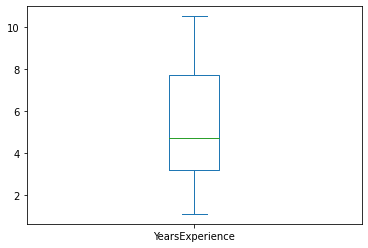

In [ ]:
#checking outlier
salary_hike.YearsExperience.plot(kind='box')

<Axes: >

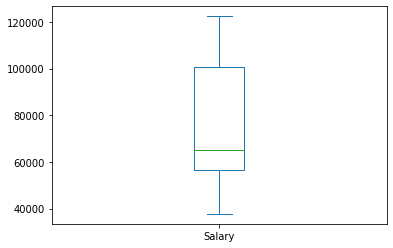

In [ ]:
salary_hike.Salary.plot(kind='box')

# There are no outliner

<Axes: xlabel='YearsExperience', ylabel='Density'>

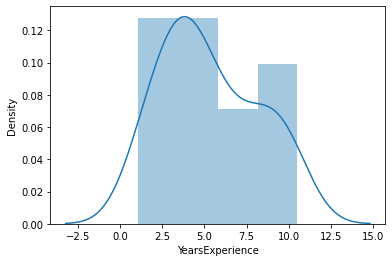

In [ ]:
sns.distplot(salary_hike['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

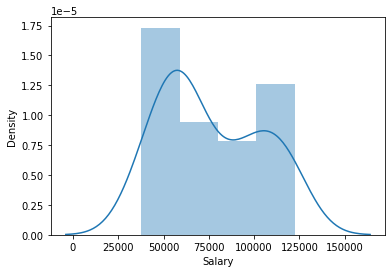

In [ ]:
sns.distplot(salary_hike['Salary'])

(array([5., 9., 4., 4., 3., 5.]),
 array([ 1.1       ,  2.66666667,  4.23333333,  5.8       ,  7.36666667,
         8.93333333, 10.5       ]),
 <BarContainer object of 6 artists>)

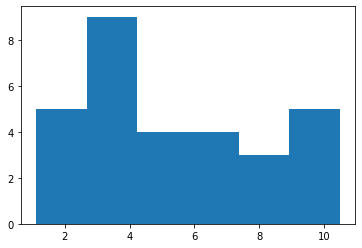

In [ ]:
plt.hist(salary_hike['YearsExperience'],bins=6)

(array([ 5., 10.,  2.,  4.,  3.,  6.]),
 array([ 37731.,  51841.,  65951.,  80061.,  94171., 108281., 122391.]),
 <BarContainer object of 6 artists>)

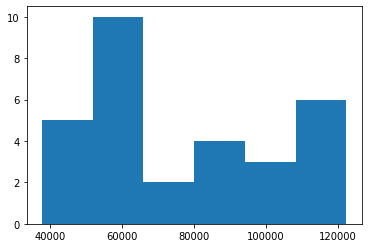

In [ ]:
plt.hist(salary_hike['Salary'],bins=6)

# Applying Transformation

In [ ]:
salary_hike['ye_sq']=salary_hike.YearsExperience**0.2
salary_hike['ye_sqrt']=salary_hike.YearsExperience**0.5
salary_hike['ye_log']=np.log(salary_hike.YearsExperience)
salary_hike['ye_sqrt4']=salary_hike.YearsExperience**0.4

In [ ]:
salary_hike

,YearsExperience,Salary,ye_sq,ye_sqrt,ye_log,ye_sqrt4
0,1.1,39343.0,1.019245,1.048809,0.095310,1.038860
1,1.3,46205.0,1.053874,1.140175,0.262364,1.110650
2,1.5,37731.0,1.084472,1.224745,0.405465,1.176079
3,2.0,43525.0,1.148698,1.414214,0.693147,1.319508
4,2.2,39891.0,1.170805,1.483240,0.788457,1.370784
5,2.9,56642.0,1.237313,1.702939,1.064711,1.530944
6,3.0,60150.0,1.245731,1.732051,1.098612,1.551846
7,3.2,54445.0,1.261915,1.788854,1.163151,1.592429
8,3.2,64445.0,1.261915,1.788854,1.163151,1.592429
9,3.7,57189.0,1.299093,1.923538,1.308333,1.687643


# Correlation Analysis

In [ ]:
salary_hike.corr()

,YearsExperience,Salary,ye_sq,ye_sqrt,ye_log,ye_sqrt4
YearsExperience,1.000000,0.978242,0.971714,0.989850,0.953797,0.984932
Salary,0.978242,1.000000,0.944032,0.964884,0.924061,0.959118
ye_sq,0.971714,0.944032,1.000000,0.995358,0.997721,0.997884
ye_sqrt,0.989850,0.964884,0.995358,1.000000,0.986620,0.999508
ye_log,0.953797,0.924061,0.997721,0.986620,1.000000,0.991233
ye_sqrt4,0.984932,0.959118,0.997884,0.999508,0.991233,1.000000


<Axes: ylabel='YearsExperience'>

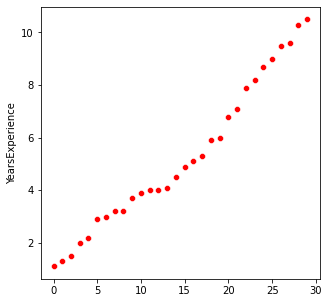

In [ ]:
plt.figure(figsize = (5,5))
sns.scatterplot(salary_hike['YearsExperience'],color='RED')

<Axes: ylabel='Salary'>

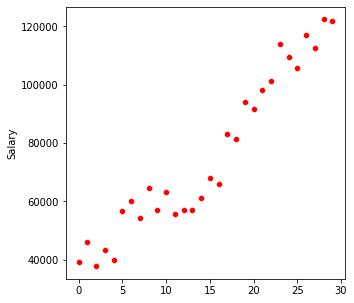

In [ ]:
plt.figure(figsize = (5,5))
sns.scatterplot(salary_hike['Salary'],color='RED')

Years and salary seems to be highly correlated

# Model Building

In [ ]:
model1=smf.ols("Salary~YearsExperience",data=salary_hike).fit()
model1_sqrt=smf.ols("Salary~ye_sqrt",data=salary_hike).fit()
model1_sq=smf.ols("Salary~ye_sq",data=salary_hike).fit()
model1_log=smf.ols("Salary~ye_log",data=salary_hike).fit()
model1_sqrt4=smf.ols("Salary~ye_sqrt4",data=salary_hike).fit()

# Model Building

In [ ]:
print(model1.params)
print(model1_sqrt.params)
print(model1_sq.params)
print(model1_log.params)
print(model1_sqrt4.params)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64
Intercept   -16055.769117
ye_sqrt      41500.680583
dtype: float64
Intercept   -138521.365038
ye_sq        157602.070301
dtype: float64
Intercept    14927.97177
ye_log       40581.98796
dtype: float64
Intercept   -36596.558035
ye_sqrt4     59929.392484
dtype: float64


In [ ]:
print(model1.tvalues)
print(model1_sqrt.tvalues)
print(model1_sq.tvalues)
print(model1_log.tvalues)
print(model1_sqrt4.tvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64
Intercept    -3.262308
ye_sqrt      19.437148
dtype: float64
Intercept    -9.710696
ye_sq        15.144115
dtype: float64
Intercept     2.895135
ye_log       12.791989
dtype: float64
Intercept    -5.680754
ye_sqrt4     17.933172
dtype: float64


In [ ]:
print(model1.pvalues)
print(model1_sqrt.pvalues)
print(model1_sq.pvalues)
print(model1_log.pvalues)
print(model1_sqrt4.pvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64
Intercept    2.906965e-03
ye_sqrt      8.565358e-18
dtype: float64
Intercept    1.832735e-10
ye_sq        5.137562e-15
dtype: float64
Intercept    7.268813e-03
ye_log       3.250155e-13
dtype: float64
Intercept    4.335319e-06
ye_sqrt4     6.943783e-17
dtype: float64


In [ ]:
print(model1.rsquared)
print(model1_sqrt.rsquared)
print(model1_sq.rsquared)
print(model1_log.rsquared)
print(model1_sqrt4.rsquared)

0.9569566641435086
0.9310009544993526
0.8911963132726747
0.8538888828756969
0.9199081554025474


In [ ]:
print(model1.rsquared_adj)
print(model1_sqrt.rsquared_adj)
print(model1_sq.rsquared_adj)
print(model1_log.rsquared_adj)
print(model1_sqrt4.rsquared_adj)

0.9554194021486339
0.9285367028743294
0.8873104673181273
0.8486706286926861
0.9170477323812098


# Model Predictions

In [ ]:
salary_hike['predicted']=model1.fittedvalues
salary_hike

,YearsExperience,Salary,ye_sq,ye_sqrt,ye_log,ye_sqrt4,predicted
0,1.1,39343.0,1.019245,1.048809,0.095310,1.038860,36187.158752
1,1.3,46205.0,1.053874,1.140175,0.262364,1.110650,38077.151217
2,1.5,37731.0,1.084472,1.224745,0.405465,1.176079,39967.143681
3,2.0,43525.0,1.148698,1.414214,0.693147,1.319508,44692.124842
4,2.2,39891.0,1.170805,1.483240,0.788457,1.370784,46582.117306
5,2.9,56642.0,1.237313,1.702939,1.064711,1.530944,53197.090931
6,3.0,60150.0,1.245731,1.732051,1.098612,1.551846,54142.087163
7,3.2,54445.0,1.261915,1.788854,1.163151,1.592429,56032.079627
8,3.2,64445.0,1.261915,1.788854,1.163151,1.592429,56032.079627
9,3.7,57189.0,1.299093,1.923538,1.308333,1.687643,60757.060788


In [ ]:
new=pd.DataFrame({'YearsExperience':[3,4.5]})

In [ ]:
model1.predict(new)

0    54142.087163
1    68317.030645
dtype: float64

In [ ]:
new['predicted']=model1.predict(new)
new

,YearsExperience,predicted
0,3.0,54142.087163
1,4.5,68317.030645
